# Garment Productivity

Source: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#

Information: 

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.


Attribute Information:

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers : Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- over_time : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time : The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

Objective: 

Create productivity prediction with `actual_productivity` as `y`

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
gwp = 'garments_worker_productivity.csv'
data = pd.read_csv(gwp)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.head().T

,0,1,2,3,4
date,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6
targeted_productivity,0.8,0.75,0.8,0.8,0.8
smv,26.16,3.94,11.41,11.41,25.9
wip,1108.0,NaN,968.0,968.0,1170.0
over_time,7080,960,3660,3660,1920
incentive,98,0,50,50,50


In [5]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

Team is just an associated team number, it's an unordered category, it's not supposed to be an integer.

In [6]:
data['team'] = data['team'].astype('category')
data['team'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False)

In [7]:
data.date = pd.to_datetime(data.date, dayfirst=False, yearfirst=False) 
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [8]:
data['date_as_int'] = data.date.dt.strftime("%Y%m%d").astype(int)
data.date_as_int

0       20150101
1       20150101
2       20150101
3       20150101
4       20150101
          ...   
1192    20150311
1193    20150311
1194    20150311
1195    20150311
1196    20150311
Name: date_as_int, Length: 1197, dtype: int32

In [9]:
cols_object = data.dtypes[data.dtypes=='object'].index.values
cols_object

array(['quarter', 'department', 'day'], dtype=object)

In [10]:
for col in cols_object:
    data[col] = data[col].str.lower().str.strip().str.replace(' ', '_')
    
data[cols_object].head().T

,0,1,2,3,4
quarter,quarter1,quarter1,quarter1,quarter1,quarter1
department,sweing,finishing,sweing,sweing,sweing
day,thursday,thursday,thursday,thursday,thursday


In [11]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()
    

date
['2015-01-01T00:00:00.000000000' '2015-01-03T00:00:00.000000000'
 '2015-01-04T00:00:00.000000000' '2015-01-05T00:00:00.000000000'
 '2015-01-06T00:00:00.000000000']
59

quarter
['quarter1' 'quarter2' 'quarter3' 'quarter4' 'quarter5']
5

department
['sweing' 'finishing']
2

day
['thursday' 'saturday' 'sunday' 'monday' 'tuesday']
6

team
[8, 1, 11, 12, 6]
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
12

targeted_productivity
[0.8  0.75 0.7  0.65 0.6 ]
9

smv
[26.16  3.94 11.41 25.9  28.08]
70

wip
[1108.   nan  968. 1170.  984.]
548

over_time
[7080  960 3660 1920 6720]
143

incentive
[98  0 50 38 45]
48

idle_time
[  0.  90. 150. 270. 300.]
12

idle_men
[ 0 10 15 45 37]
10

no_of_style_change
[0 1 2]
3

no_of_workers
[59.   8.  30.5 56.  57.5]
61

actual_productivity
[0.94072542 0.8865     0.80057049 0.80038194 0.800125  ]
879

date_as_int
[20150101 20150103 20150104 20150105 20150106]
59



In [12]:
data.describe().round()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_as_int
count,1197.0,1197.0,691.0,1197.0,1197.0,1197.0,1197.0,1197.0,1197.0,1197.0,1197.0
mean,1.0,15.0,1190.0,4567.0,38.0,1.0,0.0,0.0,35.0,1.0,20150186.0
std,0.0,11.0,1837.0,3349.0,160.0,13.0,3.0,0.0,22.0,0.0,72.0
min,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,20150101.0
25%,1.0,4.0,774.0,1440.0,0.0,0.0,0.0,0.0,9.0,1.0,20150118.0
50%,1.0,15.0,1039.0,3960.0,0.0,0.0,0.0,0.0,34.0,1.0,20150203.0
75%,1.0,24.0,1252.0,6960.0,50.0,0.0,0.0,0.0,57.0,1.0,20150223.0
max,1.0,55.0,23122.0,25920.0,3600.0,300.0,45.0,2.0,89.0,1.0,20150311.0


# Exploratory Data Analysis

## Missing Data

In [13]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
date_as_int                0
dtype: int64

Missing data in wip columnn. 

In [14]:
data_with_missing = data[pd.isnull(data).any(axis=1)]
data_with_missing

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_as_int
1,2015-01-01,quarter1,finishing,thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,20150101
6,2015-01-01,quarter1,finishing,thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167,20150101
13,2015-01-01,quarter1,finishing,thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917,20150101
14,2015-01-01,quarter1,finishing,thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667,20150101
15,2015-01-01,quarter1,finishing,thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056,20150101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,quarter2,finishing,wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,20150311
1193,2015-03-11,quarter2,finishing,wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,20150311
1194,2015-03-11,quarter2,finishing,wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,20150311
1195,2015-03-11,quarter2,finishing,wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,20150311


I suspect all the missing wip is in finishing department and it means that there are no work in progress (wip) remaining. 

In [15]:
for col in data_with_missing.columns:
    print(col)
    print(data_with_missing[col].unique())
    print(data_with_missing[col].nunique())
    print()
    

date
['2015-01-01T00:00:00.000000000' '2015-01-03T00:00:00.000000000'
 '2015-01-04T00:00:00.000000000' '2015-01-05T00:00:00.000000000'
 '2015-01-06T00:00:00.000000000' '2015-01-07T00:00:00.000000000'
 '2015-01-08T00:00:00.000000000' '2015-01-10T00:00:00.000000000'
 '2015-01-11T00:00:00.000000000' '2015-01-12T00:00:00.000000000'
 '2015-01-13T00:00:00.000000000' '2015-01-14T00:00:00.000000000'
 '2015-01-15T00:00:00.000000000' '2015-01-17T00:00:00.000000000'
 '2015-01-18T00:00:00.000000000' '2015-01-19T00:00:00.000000000'
 '2015-01-20T00:00:00.000000000' '2015-01-21T00:00:00.000000000'
 '2015-01-22T00:00:00.000000000' '2015-01-24T00:00:00.000000000'
 '2015-01-25T00:00:00.000000000' '2015-01-26T00:00:00.000000000'
 '2015-01-27T00:00:00.000000000' '2015-01-28T00:00:00.000000000'
 '2015-01-29T00:00:00.000000000' '2015-01-31T00:00:00.000000000'
 '2015-02-01T00:00:00.000000000' '2015-02-02T00:00:00.000000000'
 '2015-02-03T00:00:00.000000000' '2015-02-04T00:00:00.000000000'
 '2015-02-05T00:00:0

Impute missing with 0

In [16]:
data.wip = data.wip.fillna(0)
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
date_as_int              0
dtype: int64

### Target Variable 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='actual_productivity', ylabel='Count'>

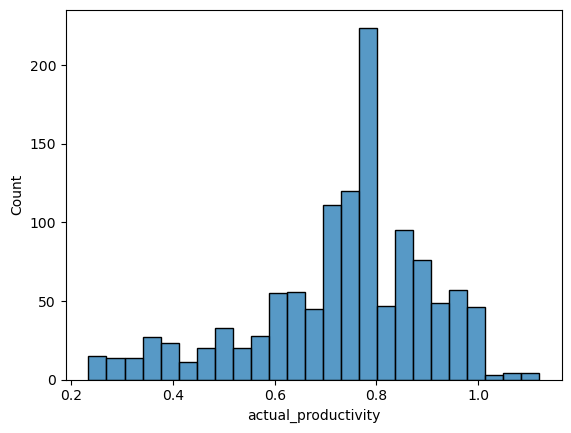

In [18]:
sns.histplot(data.actual_productivity, bins=25)

In [19]:
import math
import numpy as np
from scipy.stats import shapiro

shapiro(data.actual_productivity)


ShapiroResult(statistic=0.943946361541748, pvalue=6.876279730732294e-21)

In [20]:
from scipy.stats import kstest

kstest(data.actual_productivity, 'norm')

KstestResult(statistic=0.5992184252495423, pvalue=0.0)

Since the target variable is not distributed normally, let's not use linear regression for the training later.

### Inspect Numerical and Categorical Variables

In [21]:
data.dtypes[data.dtypes=='object']

quarter       object
department    object
day           object
dtype: object

In [22]:
obj = data.dtypes[data.dtypes=='object'].index
obj

Index(['quarter', 'department', 'day'], dtype='object')

In [23]:
data[obj] = data[obj].astype('category')
data[obj].dtypes

quarter       category
department    category
day           category
dtype: object

In [24]:
data.dtypes[data.dtypes=='category'].index

Index(['quarter', 'department', 'day', 'team'], dtype='object')

<AxesSubplot:xlabel='actual_productivity', ylabel='quarter'>

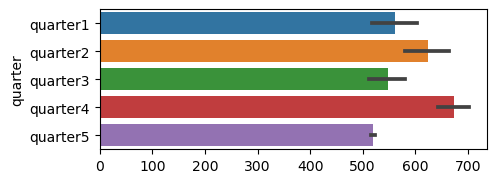

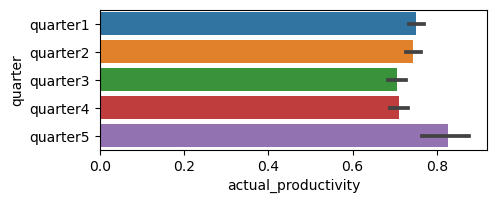

In [25]:
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
sns.barplot(x = data.index, y = data.quarter)

plt.figure(figsize=(5,4))
plt.subplot(2, 1, 2)
sns.barplot(x = data.actual_productivity, y = data.quarter)

<AxesSubplot:xlabel='actual_productivity', ylabel='department'>

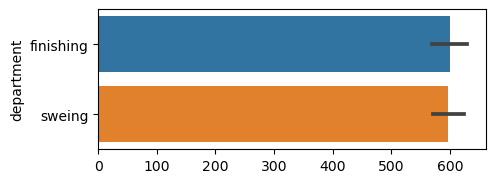

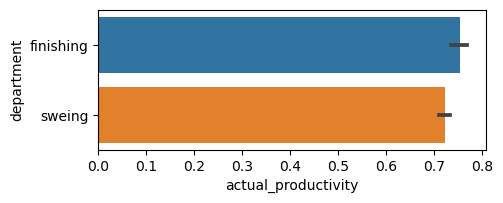

In [26]:
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
sns.barplot(x = data.index, y = data.department)

plt.figure(figsize=(5,4))
plt.subplot(2, 1, 2)
sns.barplot(x = data.actual_productivity, y = data.department)

<AxesSubplot:xlabel='actual_productivity', ylabel='day'>

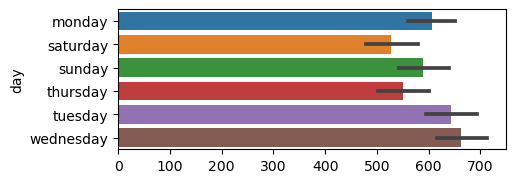

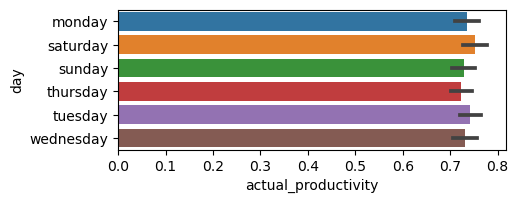

In [27]:
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
sns.barplot(x = data.index, y = data.day)

plt.figure(figsize=(5,4))
plt.subplot(2, 1, 2)
sns.barplot(x = data.actual_productivity, y = data.day)

<AxesSubplot:xlabel='actual_productivity', ylabel='team'>

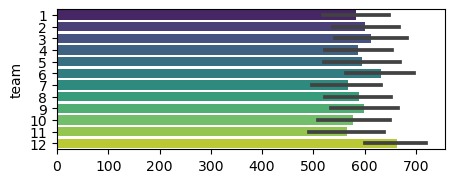

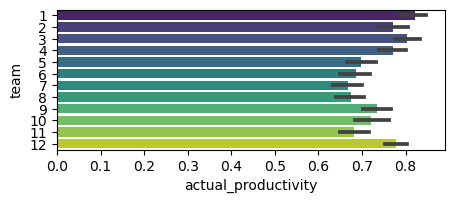

In [28]:
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
sns.barplot(x = data.index, y = data.team, palette = ("viridis"))

plt.figure(figsize=(5,4))
plt.subplot(2, 1, 2)
sns.barplot(x = data.actual_productivity, y = data.team, palette = ("viridis"))

In [29]:
num_i = data.dtypes[(data.dtypes!='category') & (data.dtypes!='datetime64[ns]')].index
num_i

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'date_as_int'],
      dtype='object')

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='targeted_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='smv'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='wip'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='over_time'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='incentive'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='idle_time'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='idle_men'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='no_of_style_change'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='no_of_workers'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='date_as_int'>

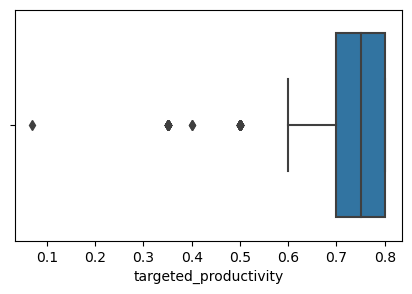

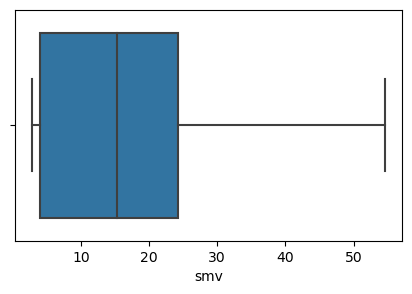

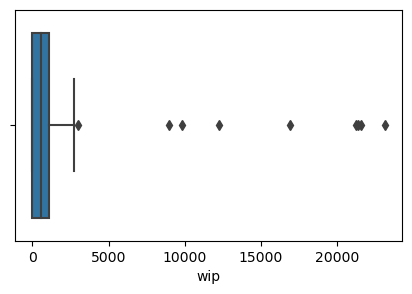

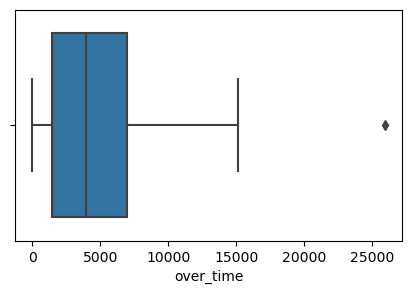

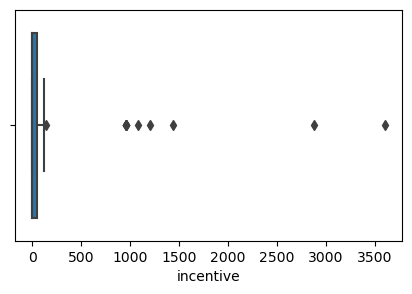

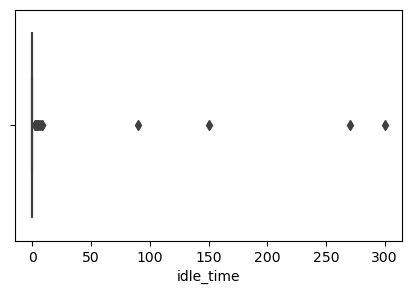

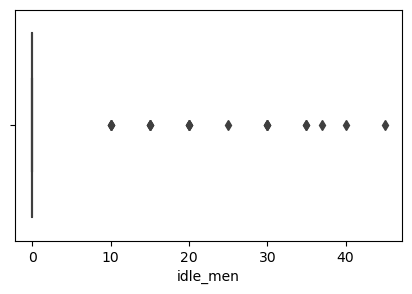

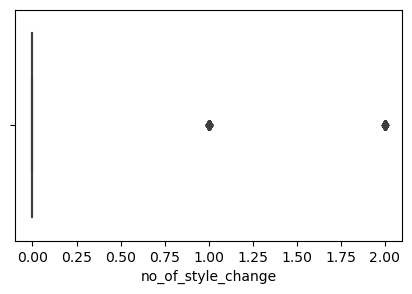

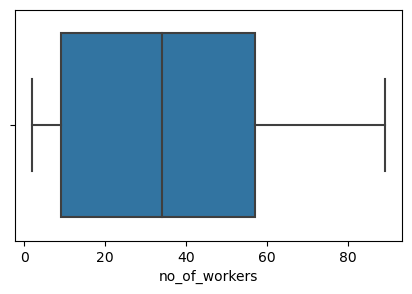

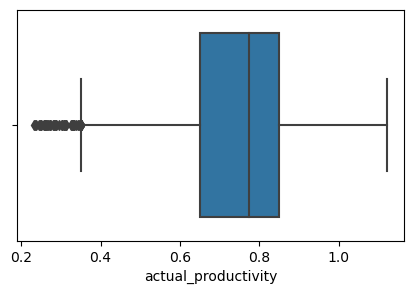

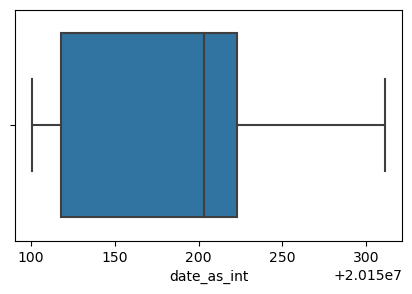

In [31]:
for i in num_i:
    plt.figure(figsize=(5,3))
    box = sns.boxplot(x = data[i])
    display(box)
    print()    
    

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='targeted_productivity', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='smv', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='wip', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='over_time', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='incentive', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='idle_time', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='idle_men', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='actual_productivity', ylabel='actual_productivity'>

<Figure size 500x300 with 0 Axes>

<AxesSubplot:xlabel='date_as_int', ylabel='actual_productivity'>

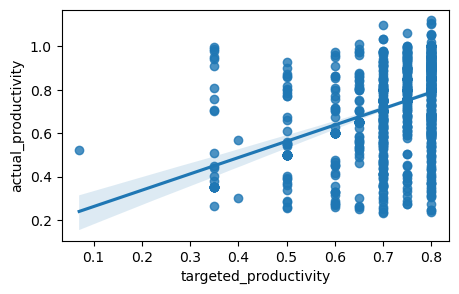

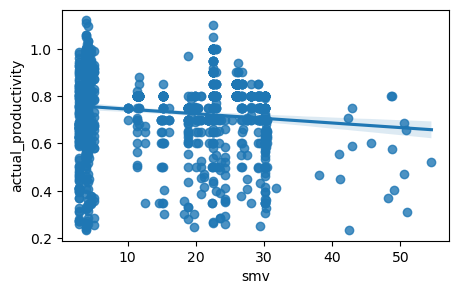

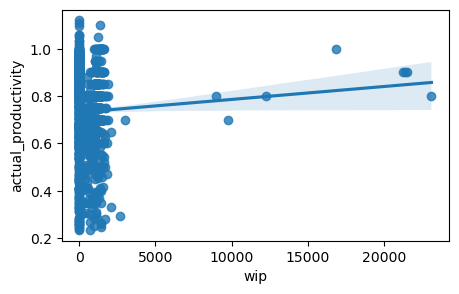

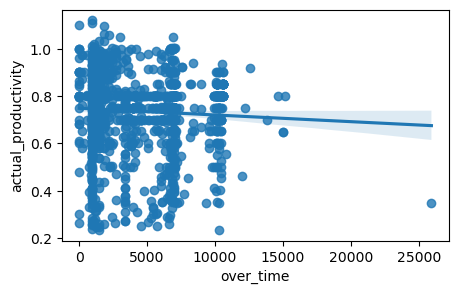

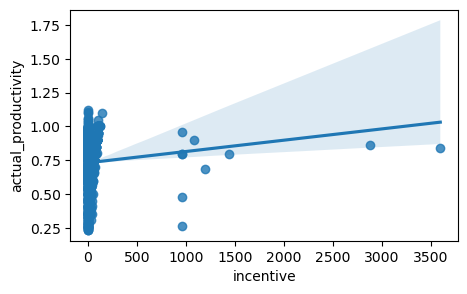

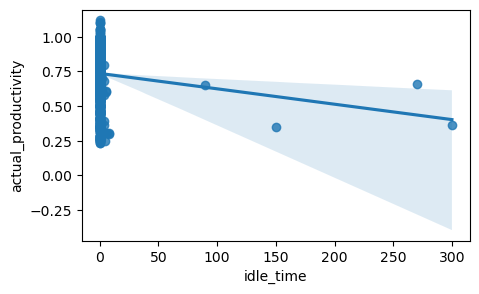

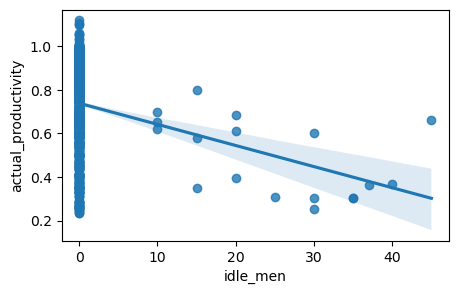

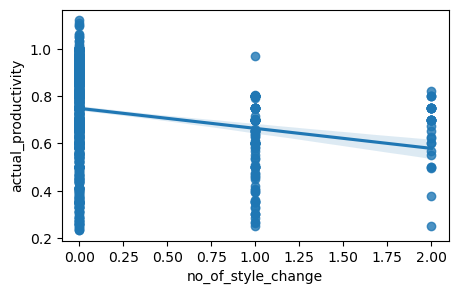

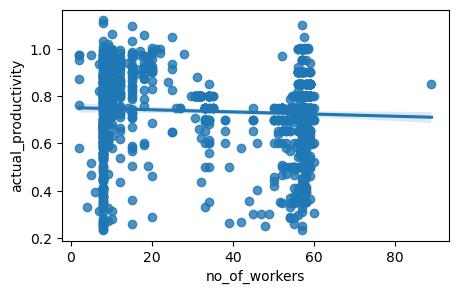

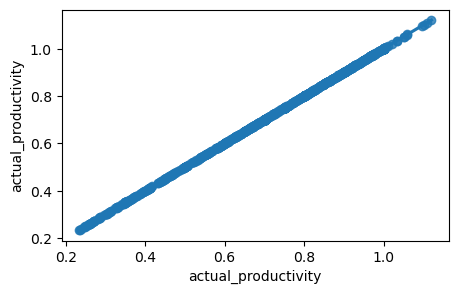

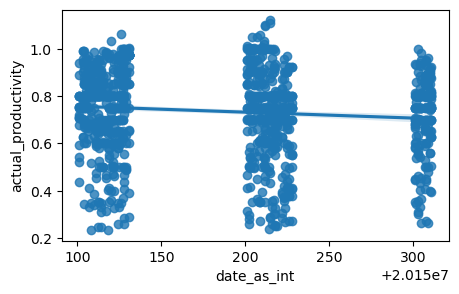

In [32]:
for i in num_i:
    plt.figure(figsize=(5,3))
    scat = sns.regplot(x = data[i], y = data.actual_productivity)
    display(scat)
    print()    
    

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

# Validation Framework

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
full_train, test = train_test_split(data, test_size=0.2, random_state=1)
train, val = train_test_split(full_train, test_size=0.25, random_state=1)

In [36]:
len(train), len(val), len(test)

(717, 240, 240)

In [37]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [38]:
y_train = train.actual_productivity.values
y_val = val.actual_productivity.values
y_test = test.actual_productivity.values

del train['actual_productivity']
del val['actual_productivity']
del test['actual_productivity']

# Feature Importance

## Correlation

In [39]:
cols_numerical = full_train.dtypes[(full_train.dtypes!='object') & (full_train.dtypes!='datetime64[ns]')].index

In [40]:
cols_numerical

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'date_as_int'],
      dtype='object')

In [41]:
full_train[cols_numerical].corrwith(full_train.actual_productivity).sort_values()

idle_men                -0.199841
no_of_style_change      -0.197214
smv                     -0.126971
date_as_int             -0.102652
idle_time               -0.102456
no_of_workers           -0.048289
over_time               -0.044882
wip                      0.063000
incentive                0.090195
targeted_productivity    0.458307
actual_productivity      1.000000
dtype: float64

In [42]:
cor_result = full_train[cols_numerical].corrwith(full_train.actual_productivity).abs().sort_values(ascending=False) 
cor_result

actual_productivity      1.000000
targeted_productivity    0.458307
idle_men                 0.199841
no_of_style_change       0.197214
smv                      0.126971
date_as_int              0.102652
idle_time                0.102456
incentive                0.090195
wip                      0.063000
no_of_workers            0.048289
over_time                0.044882
dtype: float64

In [43]:
cor_result[cor_result > 0.05]

actual_productivity      1.000000
targeted_productivity    0.458307
idle_men                 0.199841
no_of_style_change       0.197214
smv                      0.126971
date_as_int              0.102652
idle_time                0.102456
incentive                0.090195
wip                      0.063000
dtype: float64

In [44]:
cols_num_picked = cor_result[cor_result > 0.05].index
cols_num_picked

Index(['actual_productivity', 'targeted_productivity', 'idle_men',
       'no_of_style_change', 'smv', 'date_as_int', 'idle_time', 'incentive',
       'wip'],
      dtype='object')

In [45]:
cols_num_picked = cols_num_picked[1:].values

In [46]:
cols_num_picked

array(['targeted_productivity', 'idle_men', 'no_of_style_change', 'smv',
       'date_as_int', 'idle_time', 'incentive', 'wip'], dtype=object)

## Mutual Information

### Discretize Y

In [47]:
def productivity_rate(row): 
    if row.actual_productivity >= 0.9:
        return "A"
    elif row.actual_productivity >= 0.7:
        return "B"
    elif row.actual_productivity >= 0.5:
        return "C"
    elif row.actual_productivity >= 0.3:
        return "D"
    elif row.actual_productivity >= 0.1:
        return "E"

In [48]:
full_train.apply(productivity_rate, axis = 'columns')

994     B
584     A
824     A
323     B
1106    A
       ..
715     A
905     B
1096    B
235     C
1061    B
Length: 957, dtype: object

In [49]:
full_train['productivity_rate'] = full_train.apply(productivity_rate, axis = 'columns')

In [50]:
full_train['productivity_rate'].unique()

array(['B', 'A', 'D', 'C', 'E'], dtype=object)

### Calculate Mutual Information Score to Productivity Rate

In [51]:
from sklearn.metrics import mutual_info_score

In [52]:
def mutual_info_productivity(series):
    return mutual_info_score(series, full_train.productivity_rate)

In [53]:
mip = full_train[cols_object].apply(mutual_info_productivity)
mip.sort_values(ascending=False)

department    0.039128
quarter       0.020779
day           0.009361
dtype: float64

Let's pick cols with mip >= 0.01

In [54]:
cols_obj_picked = mip[mip >= 0.01].index.values
cols_obj_picked

array(['quarter', 'department'], dtype=object)

# Validation Framework

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
train[list(cols_num_picked)][:3]

,targeted_productivity,idle_men,no_of_style_change,smv,date_as_int,idle_time,incentive,wip
0,0.80,0,0,28.08,20150107,0.0,63,776.0
1,0.70,0,0,21.82,20150302,0.0,30,1511.0
2,0.65,0,0,22.52,20150124,0.0,26,1295.0


In [57]:
train[list(cols_obj_picked)][:3]

,quarter,department
0,quarter1,sweing
1,quarter1,sweing
2,quarter4,sweing


In [58]:
dv = DictVectorizer(sparse = False)

In [59]:
train_dict = train[list(cols_num_picked) + list(cols_obj_picked)].to_dict(orient = 'records') # transform cols_x_picked to list to be able to concat them
X_train = dv.fit_transform(train_dict)

In [60]:
val_dict = val[list(cols_num_picked) + list(cols_obj_picked)].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

# Baseline Model

## Decision Tree 

We'll be using decision tree as the baseline model and rmse and r2 as metric. 

In [61]:
from sklearn.tree import DecisionTreeRegressor 

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
y_pred_base = dt.predict(X_val)

In [65]:
mean_squared_error(y_val, y_pred_base)

0.030244054211006247

In [66]:
r2 = r2_score(y_val, y_pred_base)
r2

-0.14103287667455344

In [67]:
nrow = X_val.shape[0]
nrow

240

In [68]:
nfeat = X_val.shape[1]
nfeat

15

In [69]:
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
# n = number of observation, p = number of features
adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)

adj_r2 

-0.21744132823758155

Negative r squared means that the model fits badly. 

Let's tune the trees.

## Tuned Regression Tree

In [70]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred_tune_depth = dt.predict(X_val)
    nrow = X_val.shape[0]
    nfeat = X_val.shape[1]
    r2 = r2_score(y_val, y_pred_tune_depth)
    adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
    rmse = mean_squared_error(y_val, y_pred_tune_depth)
    
    print('depth: {} -> adj_r2: {} & rmse: {}'.format(depth, round(adj_r2, 3), round(rmse, 3)))

DecisionTreeRegressor(max_depth=1)

depth: 1 -> adj_r2: 0.087 & rmse: 0.023


DecisionTreeRegressor(max_depth=2)

depth: 2 -> adj_r2: 0.135 & rmse: 0.021


DecisionTreeRegressor(max_depth=3)

depth: 3 -> adj_r2: 0.206 & rmse: 0.02


DecisionTreeRegressor(max_depth=4)

depth: 4 -> adj_r2: 0.174 & rmse: 0.021


DecisionTreeRegressor(max_depth=5)

depth: 5 -> adj_r2: 0.148 & rmse: 0.021


DecisionTreeRegressor(max_depth=6)

depth: 6 -> adj_r2: 0.205 & rmse: 0.02


DecisionTreeRegressor(max_depth=10)

depth: 10 -> adj_r2: -0.063 & rmse: 0.026


DecisionTreeRegressor(max_depth=15)

depth: 15 -> adj_r2: -0.203 & rmse: 0.03


DecisionTreeRegressor(max_depth=20)

depth: 20 -> adj_r2: -0.227 & rmse: 0.03


DecisionTreeRegressor()

depth: None -> adj_r2: -0.193 & rmse: 0.03


Tree depth of 3 or 6 resulted in the best r2, but still quite bad. 

Let's tune the leaf as well.

In [71]:
scores = []

for depth in [3, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred_depth_and_leaf = dt.predict(X_val)
        nrow = X_val.shape[0]
        nfeat = X_val.shape[1]
        r2 = r2_score(y_val, y_pred_depth_and_leaf)
        adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
        rmse = mean_squared_error(y_val, y_pred_depth_and_leaf)
        
        scores.append((depth, s, adj_r2, rmse))

DecisionTreeRegressor(max_depth=3)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=15)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=500)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=200)

DecisionTreeRegressor(max_depth=6)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=15)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=20)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=500)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=200)

In [72]:
columns = ['max_depth', 'min_samples_leaf', 'adj_r2', 'rmse']
data_scores = pd.DataFrame(scores, columns=columns)
data_scores

,max_depth,min_samples_leaf,adj_r2,rmse
0,3,1,0.205924,0.019727
1,3,5,0.205930,0.019727
2,3,10,0.206475,0.019713
3,3,15,0.203492,0.019787
4,3,20,0.191595,0.020083
5,3,500,-0.068590,0.026546
6,3,100,0.156316,0.020959
7,3,200,0.105210,0.022229
8,6,1,0.192937,0.020049
9,6,5,0.278369,0.017927


In [73]:
data_scores_pivot = data_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['adj_r2','rmse'])
data_scores_pivot

adj_r2                rmse          
max_depth                3         6         3         6
min_samples_leaf                                        
1                 0.205924  0.192937  0.019727  0.020049
5                 0.205930  0.278369  0.019727  0.017927
10                0.206475  0.297263  0.019713  0.017458
15                0.203492  0.272532  0.019787  0.018072
20                0.191595  0.250719  0.020083  0.018614
100               0.156316  0.156948  0.020959  0.020943
200               0.105210  0.105210  0.022229  0.022229
500              -0.068590 -0.068590  0.026546  0.026546

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

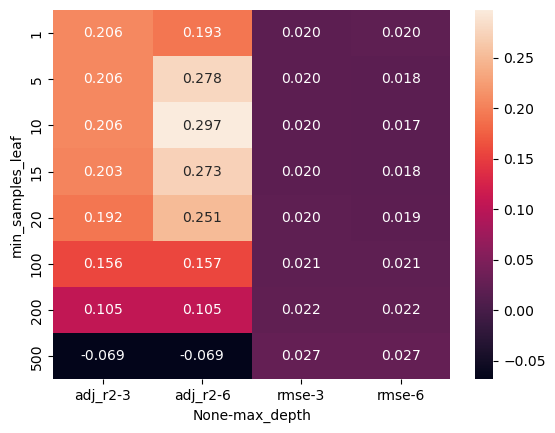

In [74]:
sns.heatmap(data_scores_pivot, annot=True, fmt=".3f")

# fmt=".3f" to adjust decimal details

In [75]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

In [76]:
from sklearn.tree import export_text

In [77]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- targeted_productivity <= 0.72
|   |--- targeted_productivity <= 0.55
|   |   |--- smv <= 4.64
|   |   |   |--- value: [0.71]
|   |   |--- smv >  4.64
|   |   |   |--- targeted_productivity <= 0.45
|   |   |   |   |--- value: [0.36]
|   |   |   |--- targeted_productivity >  0.45
|   |   |   |   |--- wip <= 1123.00
|   |   |   |   |   |--- value: [0.50]
|   |   |   |   |--- wip >  1123.00
|   |   |   |   |   |--- value: [0.45]
|   |--- targeted_productivity >  0.55
|   |   |--- incentive <= 28.00
|   |   |   |--- smv <= 4.72
|   |   |   |   |--- smv <= 4.12
|   |   |   |   |   |--- smv <= 3.92
|   |   |   |   |   |   |--- value: [0.62]
|   |   |   |   |   |--- smv >  3.92
|   |   |   |   |   |   |--- value: [0.70]
|   |   |   |   |--- smv >  4.12
|   |   |   |   |   |--- date_as_int <= 20150127.00
|   |   |   |   |   |   |--- value: [0.78]
|   |   |   |   |   |--- date_as_int >  20150127.00
|   |   |   |   |   |   |--- value: [0.82]
|   |   |   |--- smv >  4.72
|   |   |   |   |--- 

C:\Users\husad\.conda\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Random Forest

This method uses an ensemble of randomized trees to reach the results.

In [78]:
from sklearn.ensemble import RandomForestRegressor

First let's look for the best max depth. 

In [79]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred_rf = rf.predict(X_val)
        nrow = X_val.shape[0]
        nfeat = X_val.shape[1]
        r2 = r2_score(y_val, y_pred_rf)
        adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
        rmse = mean_squared_error(y_val, y_pred_rf)

        scores.append((d, n, adj_r2, rmse))

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=30, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=40, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=70, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=80, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=90, random_state=1)

RandomForestRegressor(max_depth=5, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=110, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=120, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=130, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=140, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=160, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=170, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=180, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=190, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=30, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=40, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=60, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=70, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=80, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=90, random_state=1)

RandomForestRegressor(max_depth=10, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=110, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=120, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=130, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=140, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=160, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=170, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=180, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=190, random_state=1)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=10, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=20, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=30, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=40, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=60, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=70, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=80, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=90, random_state=1)

RandomForestRegressor(max_depth=15, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=110, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=120, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=130, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=140, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=150, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=160, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=170, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=180, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=190, random_state=1)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=1)

In [80]:
columns = ['max_depth', 'n_estimators', 'adj_r2', 'rmse']
data_scores_rf = pd.DataFrame(scores, columns=columns)

In [81]:
data_scores_rf.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
max_depth,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
n_estimators,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,...,110.000000,120.000000,130.000000,140.000000,150.000000,160.000000,170.000000,180.000000,190.000000,200.000000
adj_r2,0.294019,0.315704,0.320279,0.324841,0.329214,0.331168,0.332184,0.334408,0.329814,0.327349,...,0.236204,0.236207,0.236348,0.238065,0.231113,0.230943,0.232361,0.234175,0.233624,0.233904
rmse,0.017538,0.017000,0.016886,0.016773,0.016664,0.016615,0.016590,0.016535,0.016649,0.016710,...,0.018974,0.018974,0.018971,0.018928,0.019101,0.019105,0.019070,0.019025,0.019039,0.019032


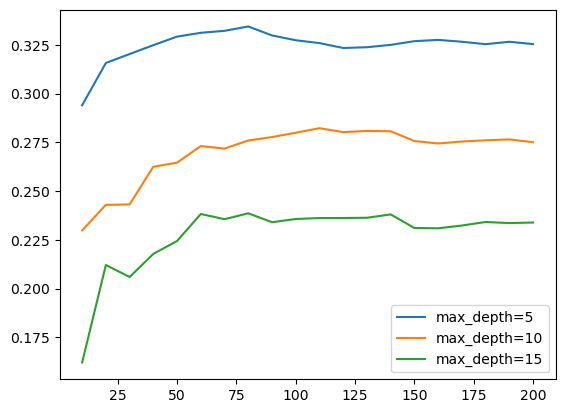

In [82]:
for d in [5, 10, 15]:
    data_subset = data_scores_rf[data_scores_rf.max_depth == d]
    plt.plot(data_subset.n_estimators, data_subset.adj_r2,
             label='max_depth=%d' % d)

plt.legend()

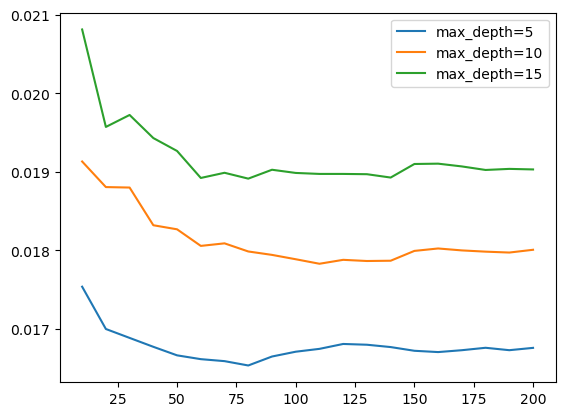

In [83]:
for d in [5, 10, 15]:
    data_subset = data_scores_rf[data_scores_rf.max_depth == d]
    plt.plot(data_subset.n_estimators, data_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

At the maximum depth of 5 is where we can find the highest adjusted R2 and the lowest RMSE. 

Let's find the minimum sample leafs.

In [84]:
max_depth = 5

In [85]:
scores2 = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred_rf = rf.predict(X_val)
        nrow = X_val.shape[0]
        nfeat = X_val.shape[1]
        r2 = r2_score(y_val, y_pred_rf)
        adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
        rmse = mean_squared_error(y_val, y_pred_rf)

        scores2.append((s, n, adj_r2, rmse))

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=30, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=40, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=70, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=80, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=90, random_state=1)

RandomForestRegressor(max_depth=5, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=110, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=120, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=130, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=140, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=160, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=170, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=180, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=190, random_state=1)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=10,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=20,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=40,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=50,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=60,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=70,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=80,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=90,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=110,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=120,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=130,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=140,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=150,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=160,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=170,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=180,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=190,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=200,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=10,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=20,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=30,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=40,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=60,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=70,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=80,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=90,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=110,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=120,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=130,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=140,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=150,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=160,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=170,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=180,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=190,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=200,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=10,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=20,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=30,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=40,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=50,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=60,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=70,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=80,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=90,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=110,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=120,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=130,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=140,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=150,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=160,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=170,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=180,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=190,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=200,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=10,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=20,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=30,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=40,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=50,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=60,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=70,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=80,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=90,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=110,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=120,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=130,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=140,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=150,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=160,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=170,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=180,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=190,
                      random_state=1)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=200,
                      random_state=1)

In [86]:
scores2

[(1, 10, 0.2940194878319228, 0.017538186347620464),
 (1, 20, 0.3157036073257802, 0.016999502741044083),
 (1, 30, 0.3202786172405385, 0.01688584892901345),
 (1, 40, 0.32484073973159366, 0.016772515270350435),
 (1, 50, 0.3292135332774887, 0.016663884979930578),
 (1, 60, 0.33116751695209035, 0.016615343512829554),
 (1, 70, 0.3321842330687914, 0.016590085936437574),
 (1, 80, 0.3344083768774907, 0.016534833067684752),
 (1, 90, 0.3298140907509477, 0.016648965745333533),
 (1, 100, 0.3273489056360114, 0.016710206636805672),
 (1, 110, 0.3258897609577349, 0.01674645516043299),
 (1, 120, 0.3233779665105825, 0.016808853935359216),
 (1, 130, 0.3237722696423584, 0.01679905853494328),
 (1, 140, 0.3249708293258954, 0.016769283544392815),
 (1, 150, 0.3268759430695215, 0.016721956119239788),
 (1, 160, 0.3275376049599765, 0.01670551890980708),
 (1, 170, 0.3265776199869972, 0.016729367153571376),
 (1, 180, 0.3253363201275189, 0.016760203908798444),
 (1, 190, 0.32657164611443534, 0.01672951555836216),
 (1,

In [87]:
columns = ['min_samples_leaf', 'n_estimators', 'adj_r2', 'rmse']
data_scores_rf2 = pd.DataFrame(scores2, columns=columns)

In [88]:
data_scores_rf2.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
min_samples_leaf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
n_estimators,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,...,110.000000,120.000000,130.000000,140.000000,150.000000,160.000000,170.000000,180.000000,190.000000,200.000000
adj_r2,0.294019,0.315704,0.320279,0.324841,0.329214,0.331168,0.332184,0.334408,0.329814,0.327349,...,0.218754,0.217321,0.217087,0.217496,0.218324,0.218086,0.217546,0.218389,0.219379,0.220116
rmse,0.017538,0.017000,0.016886,0.016773,0.016664,0.016615,0.016590,0.016535,0.016649,0.016710,...,0.019408,0.019444,0.019449,0.019439,0.019419,0.019425,0.019438,0.019417,0.019392,0.019374


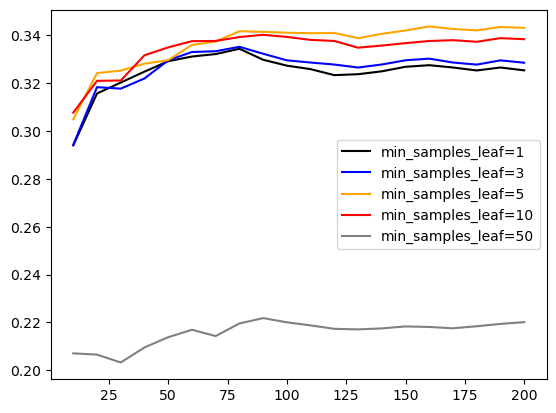

In [89]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    data_subset = data_scores_rf2[data_scores_rf2.min_samples_leaf == s]
    
    plt.plot(data_subset.n_estimators, data_subset.adj_r2,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

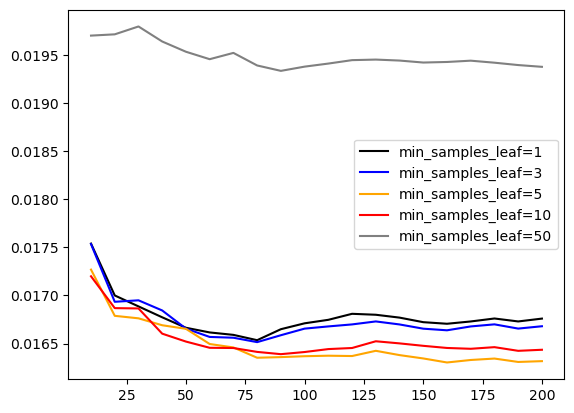

In [90]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    data_subset = data_scores_rf2[data_scores_rf2.min_samples_leaf == s]
    
    plt.plot(data_subset.n_estimators, data_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Minimal sample leafs of 5 has the best adjusted R2 and and the lowest possible RMSE. 

Our random forest is best when it has: 
- max_depth = 5
- min_samples_leaf = 5
- n_estimators = 160 

### Decision Tree vs Random Forest

In [91]:
dt_fin = DecisionTreeRegressor(max_depth = 6, 
                               min_samples_leaf = 10,
                               random_state=1)
dt_fin.fit(X_train, y_train)

y_pred_dtree = dt_fin.predict(X_val)
nrow = X_val.shape[0]
nfeat = X_val.shape[1]
r2 = r2_score(y_val, y_pred_dtree)
dt_adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
dt_rmse = mean_squared_error(y_val, y_pred_dtree)

In [92]:
rf_fin = RandomForestRegressor(n_estimators = 160,
                           max_depth = 5,
                           min_samples_leaf = 5,
                           random_state = 1)
rf_fin.fit(X_train, y_train)
        
y_pred_rf = rf_fin.predict(X_val)
nrow = X_val.shape[0]
nfeat = X_val.shape[1]
r2 = r2_score(y_val, y_pred_rf)
rf_adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
rf_rmse = mean_squared_error(y_val, y_pred_rf)

In [93]:
dt_result = pd.Series([dt_adj_r2,dt_rmse],
                      index=['adj_r2', 'rmse'])
                      
rf_result = pd.Series([rf_adj_r2,rf_rmse],
                      index=['adj_r2', 'rmse'])
                      
comparison_result = pd.DataFrame({
    'decision_tree': dt_result,
    'random_forest': rf_result
})

comparison_result

,decision_tree,random_forest
adj_r2,0.297263,0.343726
rmse,0.017458,0.016303


In the validation phase, our random forest has better result than the decision tree, with lesser rmse and more adjusted r square. Next, let's try both on the test set. 

In [94]:
full_train_dict = full_train[list(cols_num_picked) + list(cols_obj_picked)].to_dict(orient = 'records') # transform cols_x_picked to list to be able to concat them
X_full_train = dv.fit_transform(full_train_dict)
X_full_train

array([[2.0150301e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.6660000e+01,
        6.0000000e-01, 1.5780000e+03],
       [2.0150203e+07, 1.0000000e+00, 0.0000000e+00, ..., 4.1500000e+00,
        7.0000000e-01, 0.0000000e+00],
       [2.0150218e+07, 1.0000000e+00, 0.0000000e+00, ..., 2.9000000e+00,
        8.0000000e-01, 0.0000000e+00],
       ...,
       [2.0150307e+07, 0.0000000e+00, 1.0000000e+00, ..., 1.8790000e+01,
        7.5000000e-01, 1.2260000e+03],
       [2.0150113e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.0790000e+01,
        7.0000000e-01, 1.2970000e+03],
       [2.0150304e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.1820000e+01,
        7.0000000e-01, 1.3340000e+03]])

In [95]:
y_full_train = full_train.actual_productivity.values
y_full_train[:5]

array([0.70001988, 0.97697917, 0.93686111, 0.8001171 , 0.95194444])

In [96]:
del full_train['actual_productivity']

In [97]:
test_dict = test[list(cols_num_picked) + list(cols_obj_picked)].to_dict(orient = 'records')
X_test = dv.transform(test_dict)
X_test                                              

array([[2.0150223e+07, 1.0000000e+00, 0.0000000e+00, ..., 5.1300000e+00,
        8.0000000e-01, 0.0000000e+00],
       [2.0150307e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.9400000e+01,
        8.0000000e-01, 9.8300000e+02],
       [2.0150216e+07, 0.0000000e+00, 1.0000000e+00, ..., 1.8790000e+01,
        6.0000000e-01, 2.1030000e+03],
       ...,
       [2.0150207e+07, 1.0000000e+00, 0.0000000e+00, ..., 4.0800000e+00,
        8.0000000e-01, 0.0000000e+00],
       [2.0150308e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.6820000e+01,
        5.0000000e-01, 7.1100000e+02],
       [2.0150309e+07, 1.0000000e+00, 0.0000000e+00, ..., 2.9000000e+00,
        7.5000000e-01, 0.0000000e+00]])

In [98]:
y_test[:5]

array([0.9025    , 0.80057895, 0.32996488, 0.59734849, 0.7866    ])

In [99]:
dt_fin.fit(X_full_train, y_full_train)

y_pred_dtree = dt_fin.predict(X_test)
nrow = X_test.shape[0]
nfeat = X_test.shape[1]
r2 = r2_score(y_test, y_pred_dtree)
dt_adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
dt_rmse = mean_squared_error(y_test, y_pred_dtree)

In [100]:
rf_fin.fit(X_full_train, y_full_train)
        
y_pred_rf = rf_fin.predict(X_test)
nrow = X_test.shape[0]
nfeat = X_test.shape[1]
r2 = r2_score(y_test, y_pred_rf)
rf_adj_r2 = 1-(1-r2)*(nrow-1)/(nrow-nfeat-1)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

In [101]:
dt_result = pd.Series([dt_adj_r2,dt_rmse],
                      index=['adj_r2', 'rmse'])
                      
rf_result = pd.Series([rf_adj_r2,rf_rmse],
                      index=['adj_r2', 'rmse'])
                      
comparison_result = pd.DataFrame({
    'decision_tree': dt_result,
    'random_forest': rf_result
})

comparison_result

,decision_tree,random_forest
adj_r2,0.283590,0.314876
rmse,0.021506,0.020567


When we tried the model to train with full_train against test, random forest still wins. 

# BentoML

In [103]:
# import bentoml

In [107]:
# bentoml.sklearn.save_model('garment_productivity_model',
#                            rf_fin,
#                            custom_objects={'DictVectorizer': dv})

Model(tag="garment_productivity_model:jble72s566bhfxcb", path="C:\Users\husad\bentoml\models\garment_productivity_model\jble72s566bhfxcb\")